# 选择数据集

选择泰坦尼克号数据来分析

# 提出问题
  
  1.性别对乘客生还率的影响？    
  2.舱位等级对生还率的影响？  
  3.年龄对生还率的影响？  
  4.性别与舱位对生还率的共同影响？


# 数据加工
## 导入包

In [1]:
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


## 载入数据

In [2]:
filename = 'G:/Udacity-DAND/Udacity-Data-Analyst/p2/titanic-data.csv'
titanic_passenger_data = pd.read_csv(filename)

## 熟悉数据

*    PassengerId => 乘客ID
*    Survived => 是否生还
*    Pclass => 乘客等级(1/2/3等舱位)
*    Name => 乘客姓名
*    Sex => 性别
*    Age => 年龄
*    SibSp => 堂兄弟/妹个数
*    Parch => 父母与小孩个数
*    Ticket => 船票信息
*    Fare => 票价
*    Cabin => 船舱门牌号
*    Embarked => 登船港口

In [3]:
# 查看前5行数据，了解数据的信息，及格式
titanic_passenger_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 查看数据的统计信息
titanic_passenger_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


根据以上信息可知：  
1.船上总共有891名乘客  
2.乘客平均年龄在30岁左右，比较年轻  
3.平均生还率在38%左右  
4.年龄与船舱门牌号数据有缺失

## 数据清洗

In [5]:
# 查看数据的缺失情况
titanic_passenger_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

从上可知：  
1.年龄缺失数据117条  
2.船舱门牌号缺失数据687条  
3.登船港口缺失数据2条

年龄数据在分析中要用到，因此要对其缺失值做处理

Age：$\frac{117}{891} = 0.1987 $  

1.Age缺失值占总数据将近20%,用部分删除法(Partial Deletion)不适合

2.Age可能是影响生还率的原因之一，所以如果是空值会影响统计结果，因此选择均值插补法(Mean Imputation)，在年龄缺失处，插补其他年龄数据的均值

In [6]:
# 获取平均年龄
passenger_mean_age = titanic_passenger_data['Age'].mean()

# 用平均年龄填充缺失值
titanic_passenger_data.fillna(passenger_mean_age, inplace = True)
# 查看填充情况
titanic_passenger_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 处理性别数据
性别数据是字符串，不方便计算，将其转为数值

In [7]:
# 0代表男性 1代表女性
#titanic_passenger_data['Sex'].replace(['male','female'], [0,1],inplace = True)

#titanic_passenger_data.describe()

# 数据探索

In [8]:
# 获取生还乘客的数据
survived_passenger_df = titanic_passenger_data[titanic_passenger_data.Survived == 1]

In [9]:
# 按照name对乘客进行分组后，计算每组的人数 
def group_passenger_count(data,name):
    # 按照name对乘客进行分组后，每个组的人数
    return data.groupby(name)['PassengerId'].count()

# 计算每个组的生还率    
def group_passenger_survival_rate(name):
    # 按照name对全体乘客进行分组后，每个组的人数
    group_all_passenger_count = group_passenger_count(titanic_passenger_data,name)
    # 按照name对生还乘客进行分组后，每个组的人数
    group_survived_passenger_count = group_passenger_count(survived_passenger_df,name)
    # 每个组的生还率
    return group_survived_passenger_count/group_all_passenger_count

# 输出饼图
def print_pie(group_data,title):
    # 按照name对乘客进行分组后，每个组的人数
    group_data.plot.pie(title=title,figsize=(6, 6),autopct='%3.1f%%',startangle = 90,legend=True)
    
# 输出柱状图
def print_bar(data,title):
    bar=data.plot.bar(title=title)
    for p in bar.patches:
        bar.annotate('%3.1f%%' % (p.get_height()*100), (p.get_x() * 1.005, p.get_height() * 1.005))

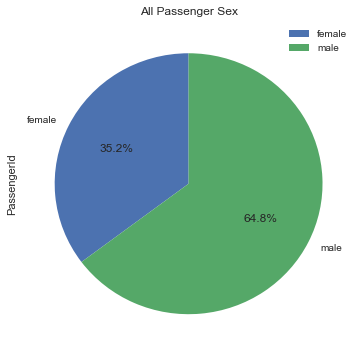

In [10]:
# 全体乘客的性别比例
print_pie(group_passenger_count(titanic_passenger_data,'Sex'),'All Passenger Sex')

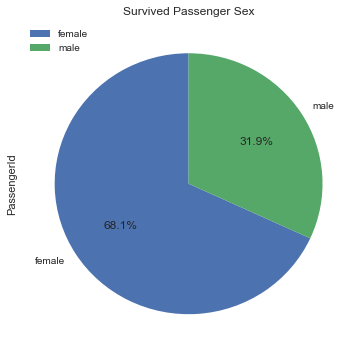

In [11]:
# 生还乘客的性别比例
print_pie(group_passenger_count(survived_passenger_df,'Sex'),'Survived Passenger Sex')

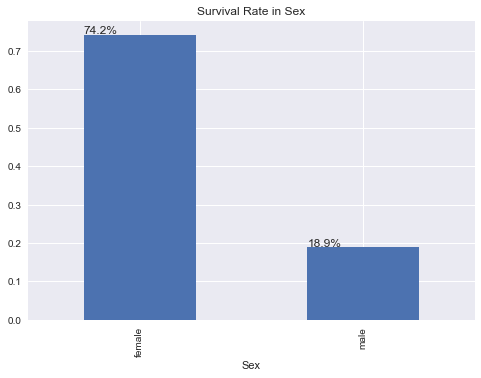

In [12]:
# 不同性别的生还率
print_bar(group_passenger_survival_rate('Sex'),'Survival Rate in Sex')

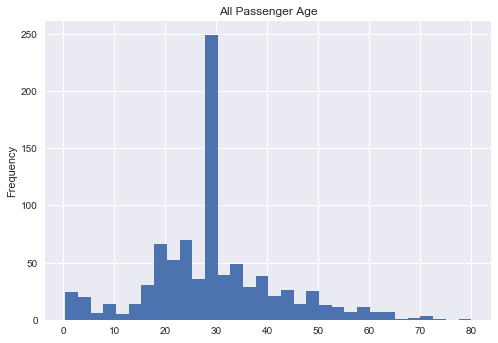

In [13]:
# 全体乘客的年龄的直方图
titanic_passenger_data['Age'].plot.hist(bins=32,title='All Passenger Age')

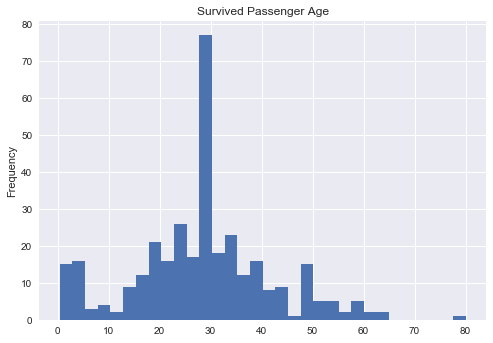

In [14]:
# 生还乘客的年龄的直方图
survived_passenger_df['Age'].plot.hist(bins=32,title='Survived Passenger Age')

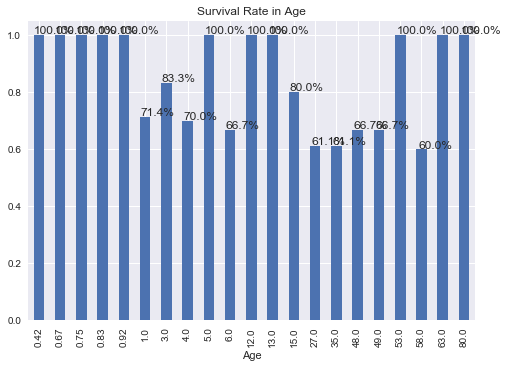

In [15]:
# 不同年龄的生还率
group_age_survival_rate=group_passenger_survival_rate('Age')
# 过滤生还率在50%以上的年龄
group_age_survival_rate=group_age_survival_rate[group_age_survival_rate>0.5]
# 显示生还率在50%以上的年龄的柱状图
print_bar(group_age_survival_rate,'Survival Rate in Age')

从上面数据可以看出：  
1.全部乘客与生还乘客的年龄分布情况差不多  
2.其中，28-30岁的柱子特别高，是因为是用年龄的均值填充缺失值
3.生还率50%以上的人，0-6岁，12-15岁，27-35岁生还率挺高

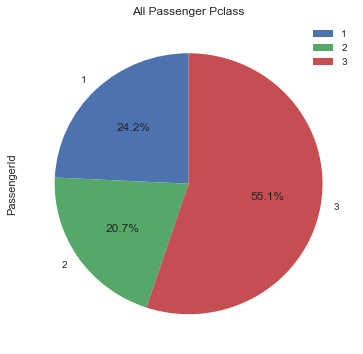

In [16]:
# 全部乘客的舱位比例
print_pie(group_passenger_count(titanic_passenger_data,'Pclass'),'All Passenger Pclass')

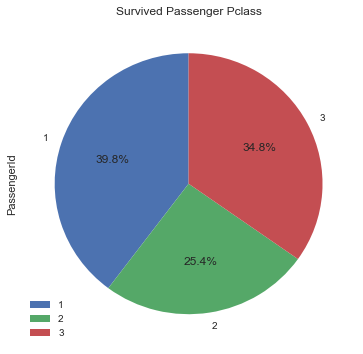

In [17]:
# 生还的乘客的舱位比例
print_pie(group_passenger_count(survived_passenger_df,'Pclass'),'Survived Passenger Pclass')

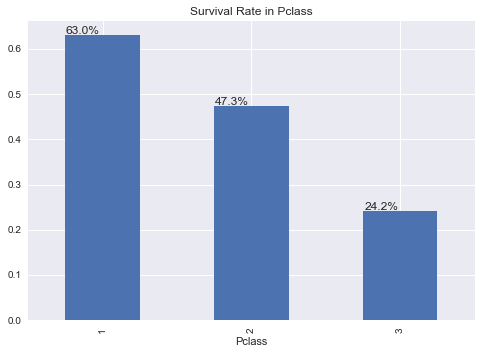

In [18]:
# 不同舱位的生还率
print_bar(group_passenger_survival_rate('Pclass'),'Survival Rate in Pclass')

从中可以看出：  
1.三等舱乘客最多，占56.1%  
2.一等舱生还率最高，占63%，三等舱生还率最低，只有24.3%，二等舱生还率是 47.3%

# 性别与舱位对生还率的共同影响

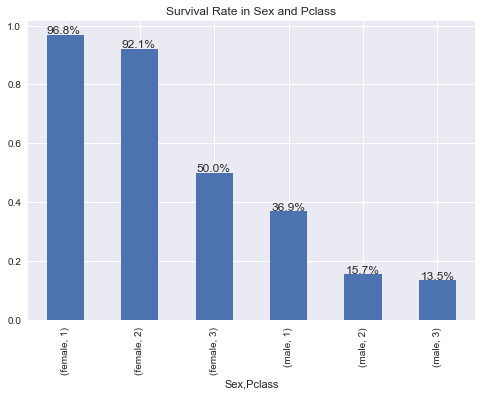

In [19]:
# 不同性别和舱位的生还率
print_bar(group_passenger_survival_rate(['Sex','Pclass']),'Survival Rate in Sex and Pclass')

可以看到，对于生还率的影响，首先是性别，女性的生还率高于男性。
其次是舱位，1等舱的生还率高于2等舱和3等舱。

# 结论

通过分析，可知，对生还率影响最大的是性别，其次是舱位，最后是年龄

## 分析的局限性

1.因为没有对照组，根据所给的数据集，只能得出性别、舱位、年龄与生还率的相关性，不能得出因果关系  
2.年龄用均值填充了将近20%的缺失值，可能会导致对年龄影响生还率的误差较大  
3.除了给到的数据，可能影响生还率的其他因素无法考量，比如身体素质、职业等